In [9]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "mlg-ulb/creditcardfraud",
    "creditcard.csv"
)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


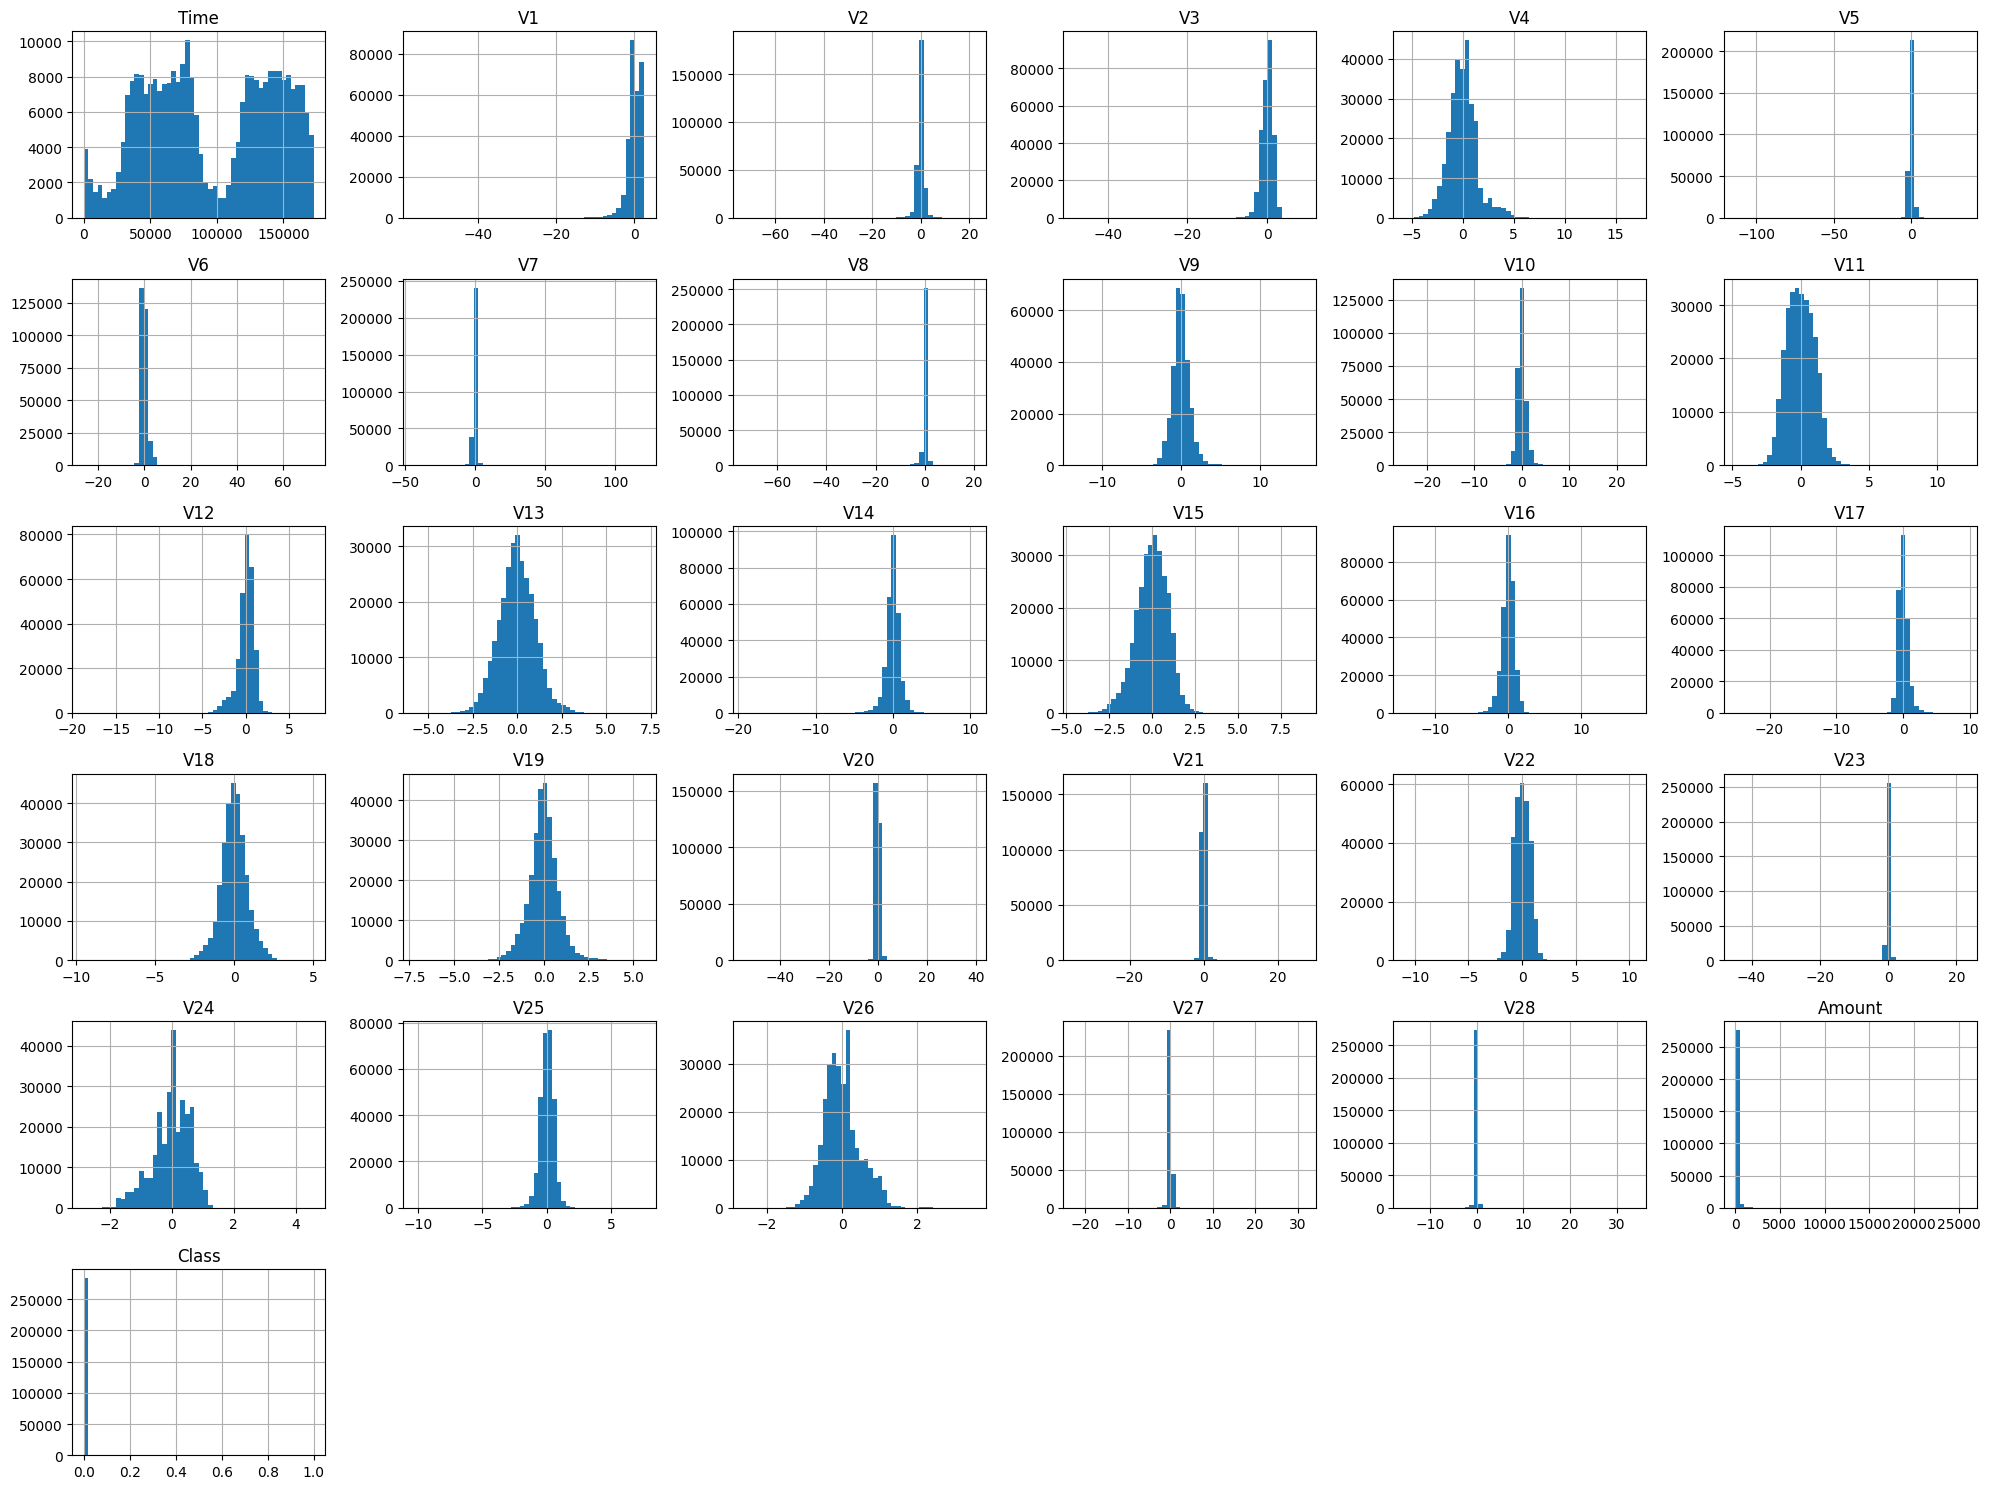

In [8]:
df.hist(bins =50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [7]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


/tmp/ipython-input-11-989599324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")


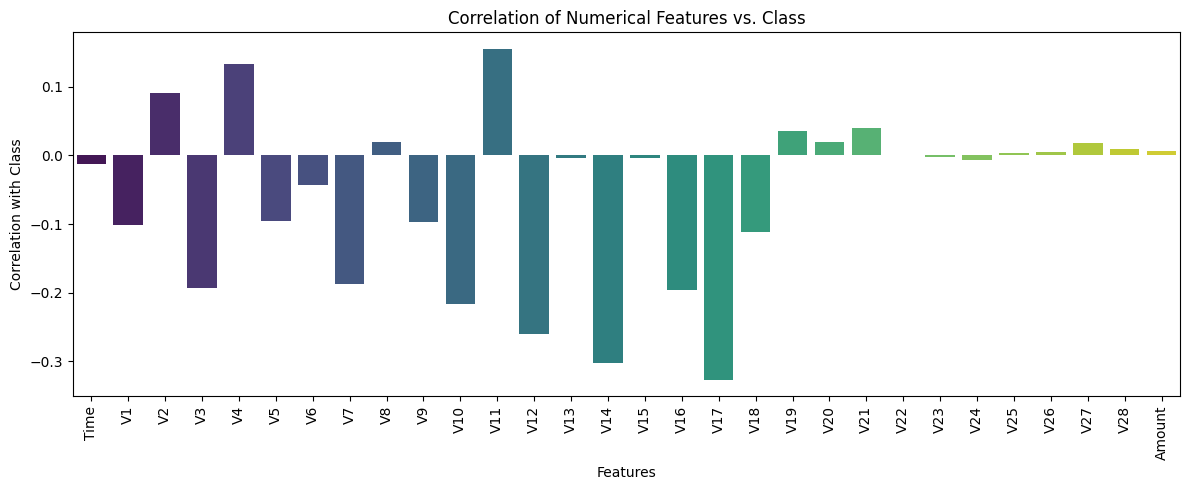

In [11]:
correlations = df.corr()['Class'].drop('Class')

# Bar plot
plt.figure(figsize=(12, 5))
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation with Class")
plt.title("Correlation of Numerical Features vs. Class")
plt.tight_layout()
plt.show()

Preprocessing data

In [12]:
from sklearn.preprocessing import StandardScaler
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
df = df.drop(['Amount'],axis=1)

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [14]:
df= df.drop(['Time'],axis=1)

In [15]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [19]:
X = df.iloc[:,df.columns != 'Class']

In [22]:
y = df.iloc[:,df.columns =='Class']

In [23]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [25]:
X_train.shape

(199364, 29)

In [26]:
X_test.shape

(85443, 29)

Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators=100)

In [31]:
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [32]:
y_pred = rf.predict(X_test)

In [33]:
rf.score(X_test,y_test)

0.9996254813150287

<Axes: >

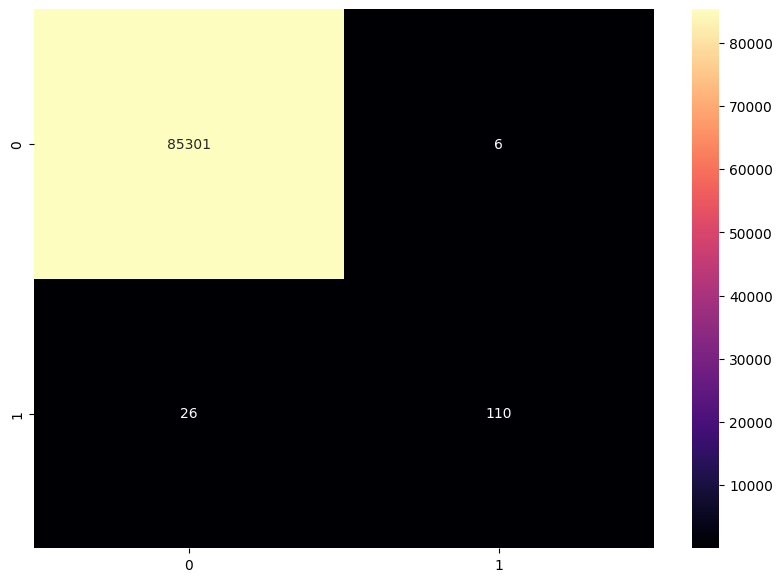

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm_rf = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sns.heatmap(cm_rf, annot=True, fmt='g',cmap='magma')

In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9996 	precision:0.9483 	recall:0.8088 	F1-score:0.8730


In [47]:
cv_results = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
cv_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999625,0.191176,0.808824,0.948276,0.873016


In [51]:
from sklearn.metrics import roc_curve, auc

In [52]:
fpr,tpr,_  = roc_curve(y_test,y_pred)

In [53]:
roc_auc = auc(fpr,tpr)

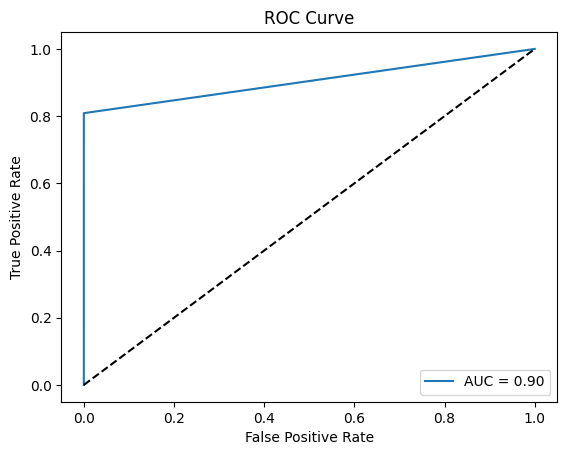

In [54]:
plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [57]:
dt = DecisionTreeClassifier()

In [58]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred_dt = dt.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print('Decision Tree Classifier:')
print('accuracy: %0.4f' % acc_dt, '\tprecision: %0.4f' % prec_dt, '\trecall: %0.4f' % rec_dt, '\tF1-score: %0.4f' % f1_dt)

Decision Tree Classifier:
accuracy: 0.9993 	precision: 0.7533 	recall: 0.8309 	F1-score: 0.7902


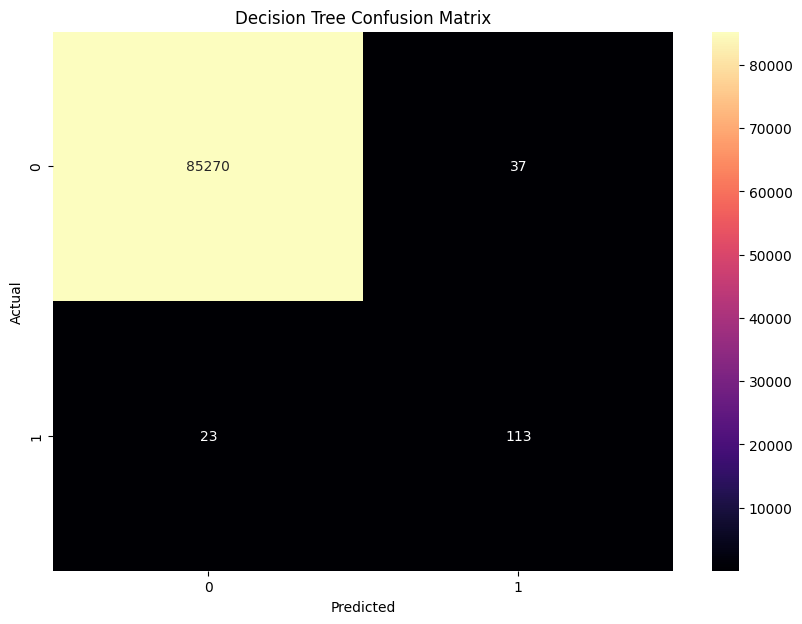

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt_df = pd.DataFrame(cm_dt, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt_df, annot=True, fmt='g', cmap='magma')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

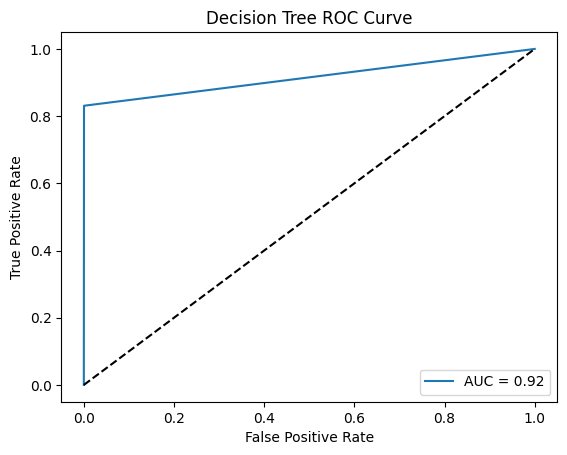

In [62]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, label="AUC = %0.2f" % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [66]:
from sklearn.tree import DecisionTreeClassifier

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999625,0.191176,0.808824,0.948276,0.873016
1,DecisionTree,0.999298,0.169118,0.830882,0.753333,0.790210
2,DecisionTree,0.999298,0.169118,0.830882,0.753333,0.790210


In [68]:
cv_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999625,0.191176,0.808824,0.948276,0.873016
1,DecisionTree,0.999298,0.169118,0.830882,0.753333,0.790210


Neural Network Models


In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [70]:
model = Sequential([
    Dense(units=16, input_dim=29, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.fit(X_train,y_train, batch_size=15,epochs=10)

Epoch 1/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9988 - loss: 0.0184
Epoch 2/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9993 - loss: 0.0044
Epoch 3/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9993 - loss: 0.0047
Epoch 4/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9993 - loss: 0.0035
Epoch 5/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9993 - loss: 0.0040
Epoch 6/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9994 - loss: 0.0032
Epoch 7/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9994 - loss: 0.0036
Epoch 8/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9993 - loss: 0.0040
Epoch 9/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9994 - loss: 0.0033
Epoch 10/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9995 - loss: 0.0028


In [72]:
score = model.evaluate(X_test,y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9994 - loss: 0.0034


In [73]:
print(score)

[0.0027230626437813044, 0.9994499087333679]


Accuracy of almost 99.94%

In [74]:
y_pred = model.predict(X_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [75]:
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] =0

<Axes: >

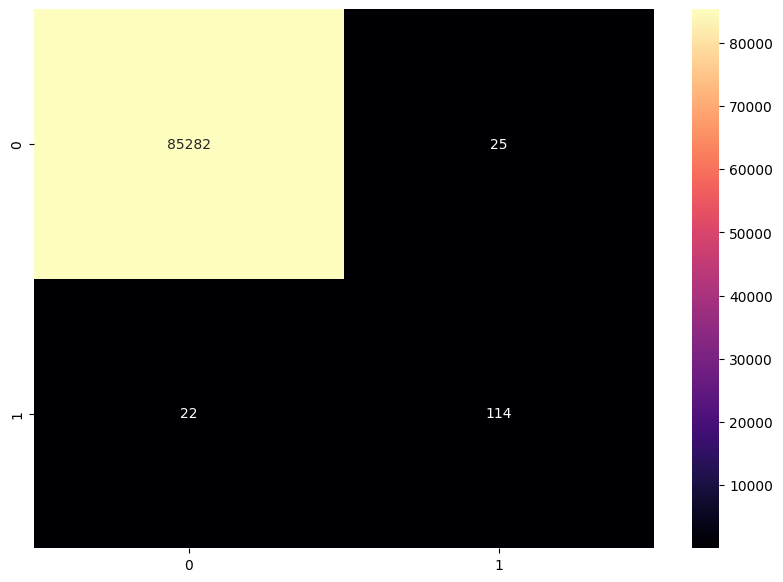

In [76]:
cm_ann = confusion_matrix(y_test,y_pred)
cm_ann_df = pd.DataFrame(cm_ann, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.heatmap(cm_ann_df, annot=True, fmt='g',cmap='magma')

In [77]:
acc_ann = accuracy_score(y_test, y_pred)
prec_ann = precision_score(y_test, y_pred)
rec_ann = recall_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred)

In [86]:
cv_results_ann = pd.DataFrame([['Neural Network', acc_ann, 1 - rec_ann, rec_ann, prec_ann, f1_ann]],
                           columns=['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
cv_results  = pd.concat([cv_results, cv_results_ann], ignore_index=True)

In [87]:
cv_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999625,0.191176,0.808824,0.948276,0.873016
1,DecisionTree,0.999298,0.169118,0.830882,0.753333,0.790210
2,Neural Network,0.999450,0.161765,0.838235,0.820144,0.829091


In [97]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Weighted Loss as there is a large class imbalance in train dataset

In [90]:
from sklearn.utils import class_weight,compute_class_weight

In [98]:
class_weights = compute_class_weight(class_weight='balanced',classes = np.unique(y_train),y = np.array([y_train[i][0] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: np.float64(0.5008944364045667), 1: np.float64(280.0056179775281)}

In [99]:
model.fit(X_train,y_train,batch_size=15,epochs=10,class_weight=class_weights,shuffle=True)

Epoch 1/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9864 - loss: 0.3828
Epoch 2/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.9595 - loss: 0.4174
Epoch 3/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9660 - loss: 0.2295
Epoch 4/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9773 - loss: 0.2466
Epoch 5/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9634 - loss: 0.3704
Epoch 6/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9697 - loss: 0.3120
Epoch 7/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9578 - loss: 0.2900
Epoch 8/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9572 - loss: 0.1700
Epoch 9/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9575 - loss: 0.2547
Epoch 10/10
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9654 - loss: 0.2602


In [100]:
score_weighted = model.evaluate(X_test,y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9767 - loss: 0.0545


In [101]:
print(score_weighted)

[0.05242731794714928, 0.9768734574317932]


In [102]:
y_pred = model.predict(X_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


<Axes: >

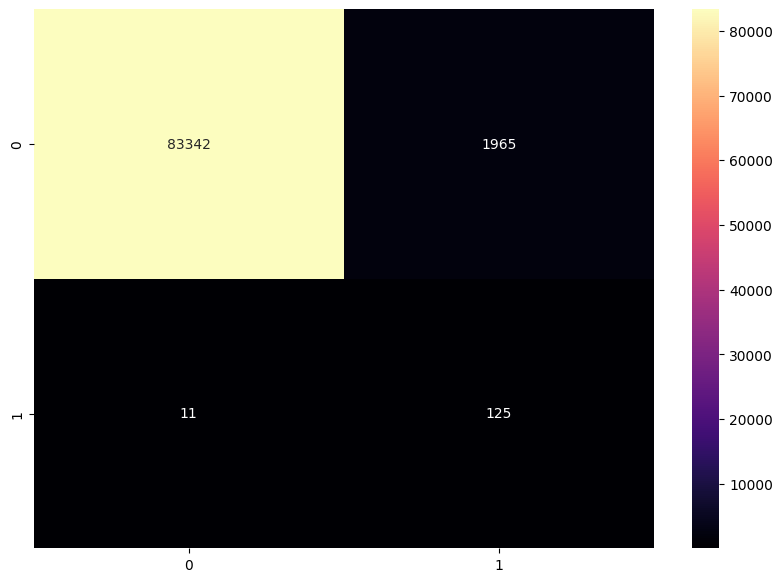

In [103]:
cm_wnn = confusion_matrix(y_test, y_pred.round())
cm_wnn_df = pd.DataFrame(cm_wnn, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_wnn_df, annot=True, fmt='g', cmap='magma')

In [104]:
acc_wnn = accuracy_score(y_test,y_pred.round())
prec_wnn = precision_score(y_test,y_pred.round())
rec_wnn = recall_score(y_test,y_pred.round())
f1_wnn = f1_score(y_test,y_pred.round())

In [105]:
cv_results_wnn = pd.DataFrame([['Weighted Neural Network', acc_wnn, 1 - rec_wnn, rec_wnn, prec_wnn, f1_wnn]],columns=['Model','Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
cv_results  = pd.concat([cv_results, cv_results_wnn], ignore_index=True)

In [106]:
cv_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999625,0.191176,0.808824,0.948276,0.873016
1,DecisionTree,0.999298,0.169118,0.830882,0.753333,0.790210
2,Neural Network,0.999450,0.161765,0.838235,0.820144,0.829091
3,Weighted Neural Network,0.976873,0.080882,0.919118,0.059809,0.112309


UNDERSAMPLING


In [107]:
fraud_indices = np.array(df[df['Class'] == 1].index)
cnt = len(fraud_indices)

In [108]:
normal_indices = np.array(df[df['Class'] == 0].index)

In [109]:
len(normal_indices)

284315

In [110]:
random_normal_indices = np.array(np.random.choice(normal_indices, cnt, replace=False))

In [111]:
len(random_normal_indices)

492

In [112]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

In [113]:
len(under_sample_indices)

984

In [114]:
under_sample_df = df.iloc[under_sample_indices,:]

In [115]:
X_under = under_sample_df.iloc[:,under_sample_df.columns != 'Class']
y_under = under_sample_df.iloc[:,under_sample_df.columns == 'Class']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size = 0.3, random_state=42)

In [117]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [118]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,341 (24.77 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,228 (16.52 KB)

In [119]:
model.fit(X_train,y_train,batch_size=15,epochs=10)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9712 - loss: 0.3995
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9639 - loss: 0.2107
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9626 - loss: 0.2031
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9584 - loss: 0.1568
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9707 - loss: 0.1069
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9627 - loss: 0.1430
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9534 - loss: 0.1542
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9519 - loss: 0.1456
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9538 - loss: 0.1939
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9621 - loss: 0.1318


In [123]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Axes: >

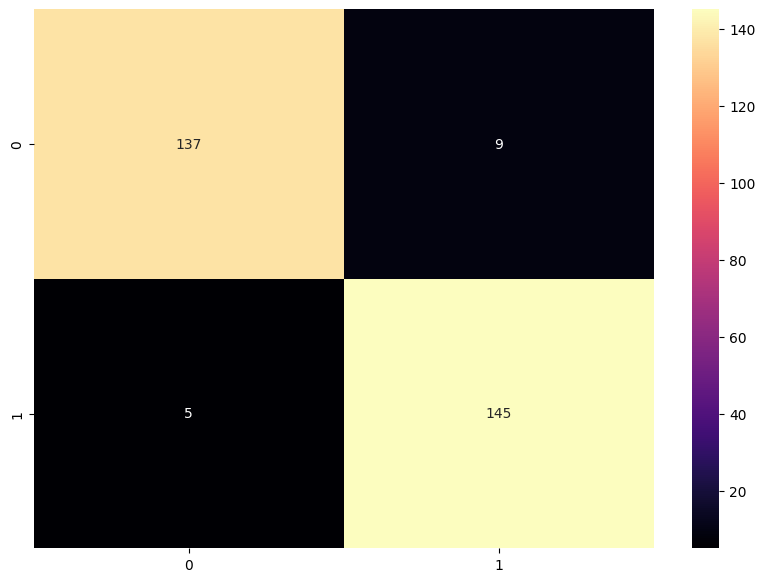

In [124]:
cm_unn = confusion_matrix(y_test,y_pred.round())
cm_unn_df = pd.DataFrame(cm_unn, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_unn_df, annot=True, fmt='g', cmap='magma')

In [125]:
acc_unn = accuracy_score(y_test,y_pred.round())
prec_unn = precision_score(y_test,y_pred.round())
rec_unn = recall_score(y_test,y_pred.round())
f1_unn = f1_score(y_test,y_pred.round())

In [126]:
cv_results_unn = pd.DataFrame([['Undersampled Neural Network', acc_unn, 1 - rec_unn, rec_unn, prec_unn, f1_unn]],columns=['Model','Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
cv_results  = pd.concat([cv_results, cv_results_unn], ignore_index=True)

In [127]:
cv_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999625,0.191176,0.808824,0.948276,0.873016
1,DecisionTree,0.999298,0.169118,0.830882,0.753333,0.790210
2,Neural Network,0.999450,0.161765,0.838235,0.820144,0.829091
3,Weighted Neural Network,0.976873,0.080882,0.919118,0.059809,0.112309
4,Undersampled Neural Network,0.952703,0.033333,0.966667,0.941558,0.953947


Testing this undersampled neural network on the entire dataset


In [129]:
y_pred2 = model.predict(X)
cm_unn_entiredf = confusion_matrix(y,y_pred2.round())

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

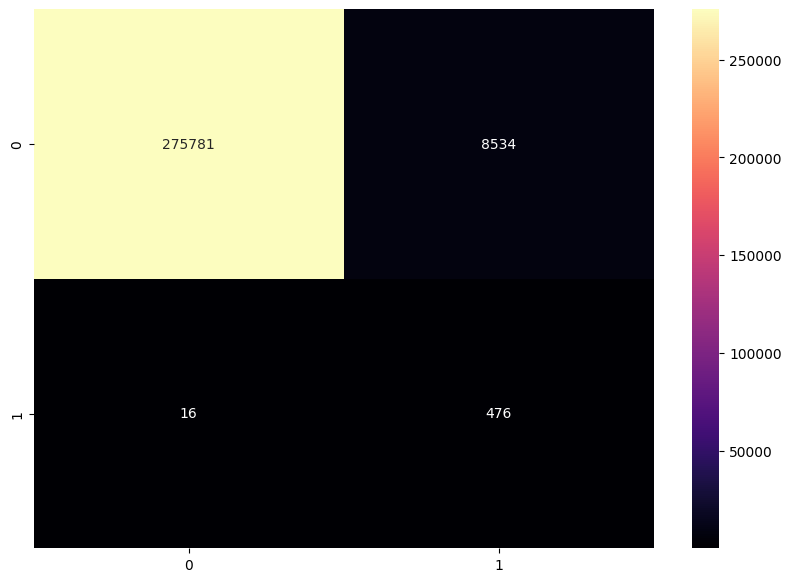

In [130]:
cm_unn_entiredf_df = pd.DataFrame(cm_unn_entiredf, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_unn_entiredf_df, annot=True, fmt='g', cmap='magma')

In [133]:
acc_unn_entire = accuracy_score(y,y_pred2.round())
prec_unn_entire = precision_score(y,y_pred2.round())
rec_unn_entire = recall_score(y,y_pred2.round())
f1_unn_entire = f1_score(y,y_pred2.round())
false_neg_rate_unn_entire = 1 - rec_unn_entire

print('Undersampled Neural Network on Entire Dataset:')
print('accuracy: %0.4f' % acc_unn_entire, '\tprecision: %0.4f' % prec_unn_entire, '\trecall: %0.4f' % rec_unn_entire, '\tF1-score: %0.4f' % f1_unn_entire, '\tFalseNegRate: %0.4f' % false_neg_rate_unn_entire)

Undersampled Neural Network on Entire Dataset:
accuracy: 0.9700 	precision: 0.0528 	recall: 0.9675 	F1-score: 0.1002 	FalseNegRate: 0.0325


Generally undersampling leads to poor precision and f1 score and it is observed here

OVERSAMPLING USING SMOTE

In [134]:
from imblearn.over_sampling import SMOTE

In [135]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y.values.ravel())

In [136]:
y_resampled

array([0, 0, 0, ..., 1, 1, 1])

In [138]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_resampled))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.Class==1]),
      '...after SMOTE upsampling: ', np.sum(y_resampled[y_resampled==1]))

Number of total transactions before SMOTE upsampling:  284807 ...after SMOTE upsampling:  568630
Number of fraudulent transactions before SMOTE upsampling:  492 ...after SMOTE upsampling:  284315


In [139]:
y_resampled = pd.DataFrame(y_resampled)
X_resampled = pd.DataFrame(X_resampled)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [141]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [142]:
final_model = Sequential([
    Dense(units=16, input_dim=29, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [143]:
final_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,113 (8.25 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [145]:
final_model.fit(X_train,y_train,batch_size=15,epochs=10)

Epoch 1/10
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.9657 - loss: 0.0855
Epoch 2/10
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.9932 - loss: 0.0227
Epoch 3/10
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.9952 - loss: 0.0165
Epoch 4/10
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.9963 - loss: 0.0138
Epoch 5/10
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.9971 - loss: 0.0118
Epoch 6/10
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.9972 - loss: 0.0109
Epoch 7/10
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - accuracy: 0.9977 - loss: 0.0093
Epoch 8/10
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - accuracy: 0.9977 - loss: 0.0091
Epoch 9/10
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.9978 - loss: 0.0093
Epoch 10/10
26537/26537 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - accuracy: 0.9981 - loss: 0.0079


In [149]:
y_pred = final_model.predict(X_test)

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


In [150]:
cm_onn = confusion_matrix(y_test,y_pred.round())
cm_onn_df = pd.DataFrame(cm_onn, index=(0, 1), columns=(0, 1))

<Axes: >

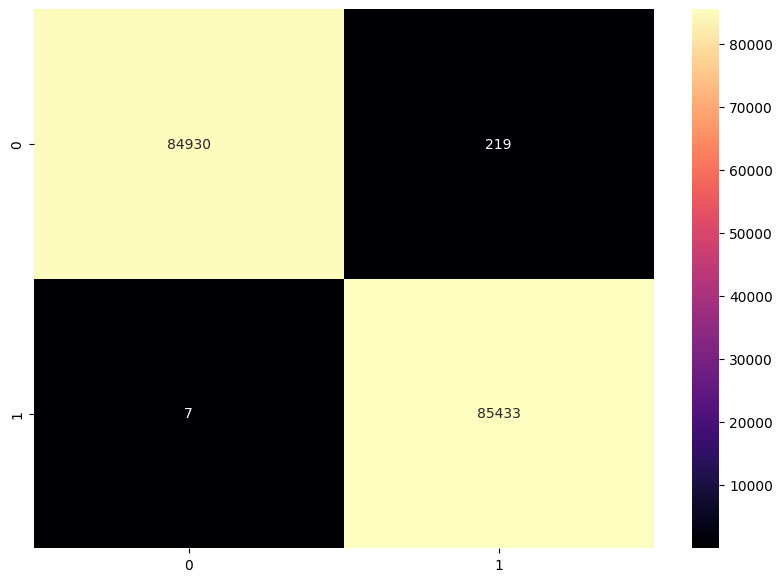

In [151]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_onn_df, annot=True, fmt='g', cmap='magma')

Almost no false negatives

In [152]:
acc_onn = accuracy_score(y_test,y_pred.round())
prec_onn = precision_score(y_test,y_pred.round())
rec_onn = recall_score(y_test,y_pred.round())
f1_onn = f1_score(y_test,y_pred.round())

In [153]:
cv_results_onn = pd.DataFrame([['Oversampled Neural Network', acc_onn, 1 - rec_onn, rec_onn, prec_onn, f1_onn]],columns=['Model','Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
cv_results = pd.concat([cv_results, cv_results_onn], ignore_index=True)

In [154]:
cv_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999625,0.191176,0.808824,0.948276,0.873016
1,DecisionTree,0.999298,0.169118,0.830882,0.753333,0.790210
2,Neural Network,0.999450,0.161765,0.838235,0.820144,0.829091
3,Weighted Neural Network,0.976873,0.080882,0.919118,0.059809,0.112309
4,Undersampled Neural Network,0.952703,0.033333,0.966667,0.941558,0.953947
5,Oversampled Neural Network,0.998675,0.000082,0.999918,0.997443,0.998679


All metrics are good here

Training on entire dataset to compare with undersampling scenario

In [155]:
y_pred2 = final_model.predict(X)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

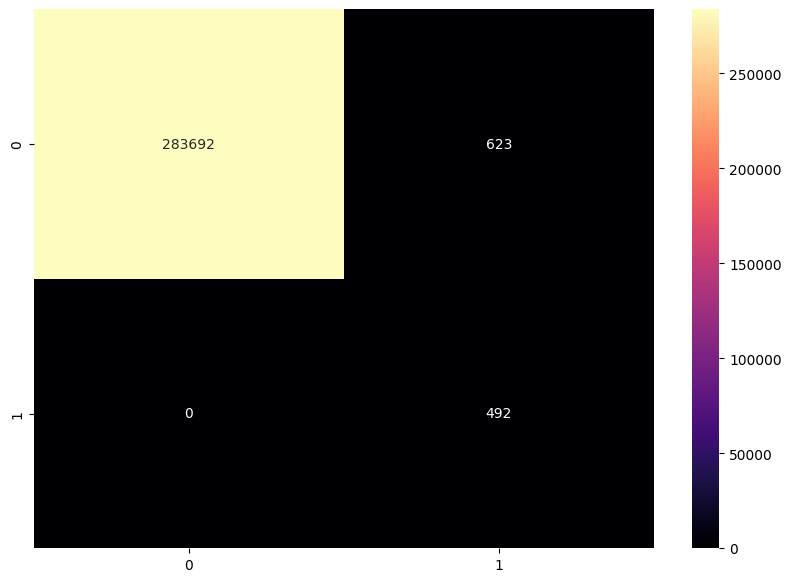

In [156]:
cm_onn_entire = confusion_matrix(y,y_pred2.round())
plt.figure(figsize=(10, 7))
sns.heatmap(cm_onn_entire, annot=True, fmt='g', cmap='magma')

No false negatives and few false positives- better than our Undersampled model

In [158]:
acc_onn_entiredf = accuracy_score(y,y_pred2.round())
prec_onn_entiredf = precision_score(y,y_pred2.round())
rec_onn_entiredf = recall_score(y,y_pred2.round())
f1_onn_entiredf = f1_score(y,y_pred2.round())
false_neg_rate_onn_entiredf = 1 - rec_onn_entiredf


In [159]:
print('Oversampled Neural Network on Entire Dataset:')
print('accuracy: %0.4f' % acc_onn_entiredf, '\tprecision: %0.4f' % prec_onn_entiredf, '\trecall: %0.4f' % rec_onn_entiredf, '\tF1-score: %0.4f' % f1_onn_entiredf, '\tFalseNegRate: %0.4f' % false_neg_rate_onn_entiredf)

Oversampled Neural Network on Entire Dataset:
accuracy: 0.9978 	precision: 0.4413 	recall: 1.0000 	F1-score: 0.6123 	FalseNegRate: 0.0000
